# Projeto 3: Otimizando Estratégias de E-Commerce com Análise de Dados

### Baixando as bibliotecas

In [36]:
%pip install pandas numpy matplotlib seaborn
%pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Peter\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 17.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------------------------- -------- 8.7/11.1 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 36.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   -------- ------------------------------- 9.2/40.9 MB 47.4 MB/s eta 0:00:01
   --------------- ------------------------ 16.0/40.9 MB 38.7 MB/s eta 0:00:01
   --------------------- ------------------ 21.8/40.9 MB 34.4 MB/s eta 0:00:01
   -------------------------- ------------- 27.5/40.9 MB 32.3 MB/s eta 0:00:01
   --------------------------------- ------ 33.8/40.9 MB 32.0 MB/s eta 0:00:01
   ----------------------------------- ---- 36.7/40.9 MB 29.5 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Peter\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Importando as Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o pandas para exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

In [5]:
try:
    df = pd.read_csv('data.csv', encoding='latin1')  # Usando encoding='latin1' para evitar erros de codificação
except FileNotFoundError:
    print("Arquivo data.csv não encontrado. Certifique-se de que o arquivo está no mesmo diretório do script.")
    # Aqui você pode incluir um código para sair do script ou fazer o upload do arquivo
except Exception as e:
    print(f"Erro ao ler o arquivo: {e}")
    # Aqui você pode incluir um código para tratar outros tipos de erro

## Passo 1: Compreensão do dataset

### Explorando o dataset

In [6]:
# Visualizando as primeiras linhas
print(df.head())

# Verificando as dimensões (linhas, colunas)
print(df.shape)

# Obtendo informações sobre os tipos de dados e valores ausentes
print(df.info())

# Resumo estatístico das variáveis numéricas
print(df.describe())

# Verificando a quantidade de valores únicos em cada coluna
print(df.nunique())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   

In [7]:
print(df.duplicated().sum())

5268


### Exibindo no modo tabelas

In [8]:
try:
    df = pd.read_csv('data.csv', encoding='latin1')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo data.csv não encontrado.")
    # Adicione lógica para parar ou tratar o erro
except Exception as e:
    print(f"Erro ao ler o arquivo: {e}")
    # Adicione lógica para parar ou tratar o erro

Dataset carregado com sucesso!


In [9]:
# Célula 2: Visualizar as primeiras linhas (renderiza como tabela)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Passo 2: Limpeza dos dados

In [11]:
# -- Passo 2: Limpeza e Preparação dos Dados --

# Criar uma cópia para não modificar o DataFrame original
df_cleaned = df.copy()

print(f"Shape original: {df_cleaned.shape}")

# 1. Tratar Valores Ausentes (CustomerID)
# Dada a importância do CustomerID para a segmentação e a grande quantidade de nulos,
# vamos remover as linhas onde CustomerID é nulo.
initial_rows = df_cleaned.shape[0]
df_cleaned.dropna(subset=['CustomerID'], inplace=True)
rows_after_customerid_nan = df_cleaned.shape[0]
print(f"Shape após remover CustomerID nulos: {df_cleaned.shape}")
print(f"Linhas removidas por CustomerID nulo: {initial_rows - rows_after_customerid_nan}")

# 2. Tratar Valores Ausentes (Description)
# Agora vamos tratar os poucos NAs restantes em Description
initial_rows = df_cleaned.shape[0]
df_cleaned.dropna(subset=['Description'], inplace=True)
rows_after_description_nan = df_cleaned.shape[0]
print(f"Shape após remover Description nulos: {df_cleaned.shape}")
print(f"Linhas removidas por Description nulo: {initial_rows - rows_after_description_nan}")

# 3. Remover Duplicatas
initial_rows = df_cleaned.shape[0]
df_cleaned.drop_duplicates(inplace=True)
rows_after_duplicates = df_cleaned.shape[0]
print(f"Shape após remover duplicatas: {df_cleaned.shape}")
print(f"Linhas duplicadas removidas: {initial_rows - rows_after_duplicates}")

# 4. Converter Tipos de Dados
# Converter InvoiceDate para datetime
try:
    df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], format='%m/%d/%Y %H:%M')
except ValueError as e:
    print(f"Erro ao converter InvoiceDate: {e}")
    # Poderíamos tentar inferir o formato ou tratar erros específicos aqui se necessário
    df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate']) # Tenta inferir

# Converter CustomerID para string (mais seguro para IDs)
# Primeiro para Int64 para garantir que é inteiro, depois para string
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype('Int64')
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(str)

print("\nInformações do DataFrame após conversão de tipos:")
df_cleaned.info()

# 5. Investigar e Tratar Valores Inconsistentes
# Verificar Quantidade Negativa (Cancelamentos)
print("\nAnálise de Quantidade Negativa:")
negative_quantity = df_cleaned[df_cleaned['Quantity'] < 0]
print(f"Total de linhas com Quantidade negativa: {len(negative_quantity)}")
# Verificar se essas linhas correspondem a cancelamentos (InvoiceNo começando com 'C')
cancelled_invoices = negative_quantity[negative_quantity['InvoiceNo'].astype(str).str.startswith('C')]
print(f"Linhas com Quantidade negativa e InvoiceNo começando com 'C': {len(cancelled_invoices)}")
# Criar uma coluna para identificar cancelamentos
df_cleaned['IsCancelled'] = df_cleaned['InvoiceNo'].astype(str).str.startswith('C')
print("\nContagem de Cancelamentos (IsCancelled):")
print(df_cleaned['IsCancelled'].value_counts())

# Verificar UnitPrice igual a zero
print("\nAnálise de UnitPrice igual a zero:")
zero_price = df_cleaned[df_cleaned['UnitPrice'] == 0]
print(f"Total de linhas com UnitPrice igual a zero: {len(zero_price)}")
# Decisão: Remover essas linhas, pois não representam vendas monetárias válidas para a maioria das análises.
initial_rows = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]
rows_after_zero_price = df_cleaned.shape[0]
print(f"Shape após remover UnitPrice zero: {df_cleaned.shape}")
print(f"Linhas removidas por UnitPrice zero: {initial_rows - rows_after_zero_price}")


# 6. Criar Novas Variáveis (Feature Engineering)
# Criar TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Extrair componentes da data
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['Weekday'] = df_cleaned['InvoiceDate'].dt.dayofweek # Monday=0, Sunday=6
df_cleaned['MonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M') # Para agrupar por mês/ano

print("\nNovas colunas criadas (TotalPrice e componentes de data).")

# Verificar o resultado final da limpeza
print("\n--- Resumo Final da Limpeza ---")
print(f"Shape final do DataFrame limpo: {df_cleaned.shape}")
print("\nVerificação de valores nulos restantes:")
print(df_cleaned.isnull().sum())
print("\nTipos de dados finais:")
df_cleaned.info()
print("\nPrimeiras 5 linhas do DataFrame limpo:")
print(df_cleaned.head())
print("\nResumo estatístico das colunas numéricas (incluindo TotalPrice):")
print(df_cleaned.describe())

Shape original: (541909, 8)
Shape após remover CustomerID nulos: (406829, 8)
Linhas removidas por CustomerID nulo: 135080
Shape após remover Description nulos: (406829, 8)
Linhas removidas por Description nulo: 0
Shape após remover duplicatas: (401604, 8)
Linhas duplicadas removidas: 5225

Informações do DataFrame após conversão de tipos:
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), objec

### Passo 3: Análise Exploratória de Dados (EDA)

#### Identificar sazonalidade e tendências nas vendas.
#### Analisar quais produtos são frequentemente comprados juntos.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização (opcional, mas melhora a aparência)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Define um tamanho padrão para as figuras

# -- Passo 3: Análise Exploratória de Dados (EDA) --

# Filtrar cancelamentos para análise de vendas
# Usaremos df_cleaned que já tem IsCancelled
df_sales = df_cleaned[df_cleaned['IsCancelled'] == False].copy()
print(f"Shape do DataFrame para análise de vendas (sem cancelamentos): {df_sales.shape}")
print(f"Shape original limpo (incluindo cancelamentos): {df_cleaned.shape}")
print(f"Número de transações de venda: {len(df_sales)}")
print(f"Número de transações de cancelamento: {len(df_cleaned) - len(df_sales)}")

Shape do DataFrame para análise de vendas (sem cancelamentos): (392692, 16)
Shape original limpo (incluindo cancelamentos): (401564, 16)
Número de transações de venda: 392692
Número de transações de cancelamento: 8872



--- Análise de Vendas Temporais ---


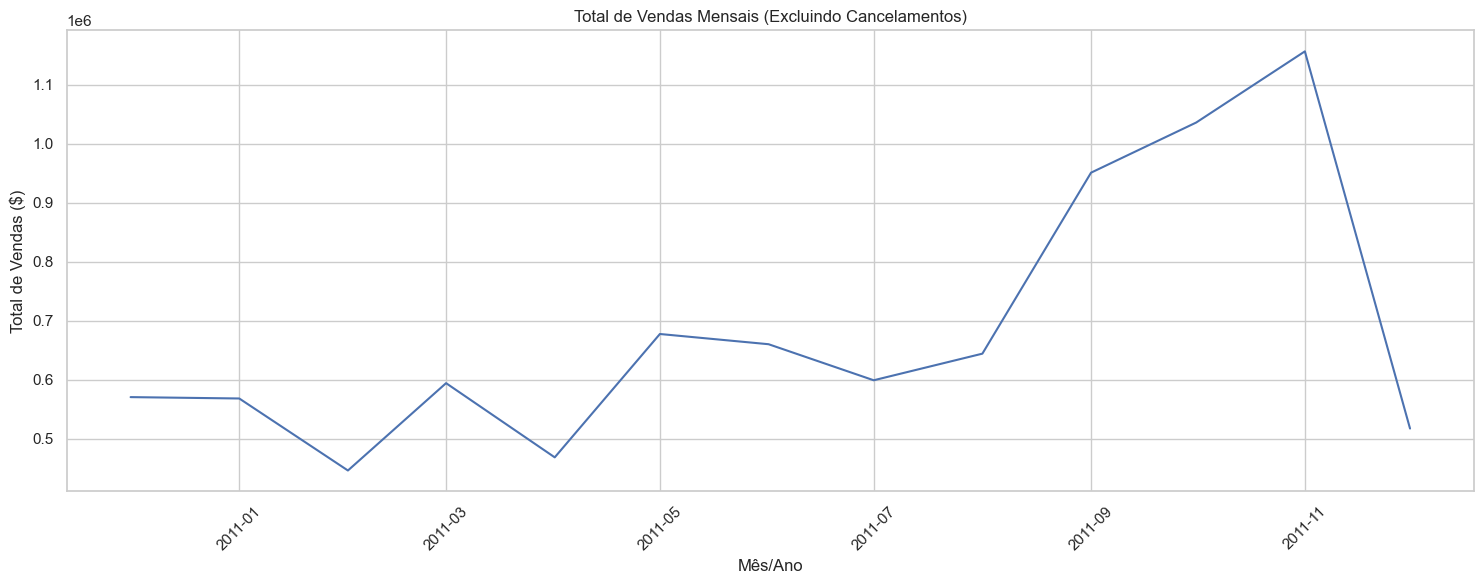

In [15]:
# 1. Análise de Vendas ao Longo do Tempo

# Agrupar por Mês/Ano e calcular o total de vendas
# Usando a coluna MonthYear que já é do tipo Period
monthly_sales = df_sales.groupby('MonthYear')['TotalPrice'].sum()

# Converter o índice Period para Datetime para plotagem mais flexível
monthly_sales.index = monthly_sales.index.to_timestamp()

# Visualização - Vendas Mensais
print("\n--- Análise de Vendas Temporais ---")
plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total de Vendas Mensais (Excluindo Cancelamentos)')
plt.xlabel('Mês/Ano')
plt.ylabel('Total de Vendas ($)')
plt.xticks(rotation=45) # Rotaciona os labels do eixo X para melhor leitura
plt.grid(True)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()



C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\1390755.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="viridis")


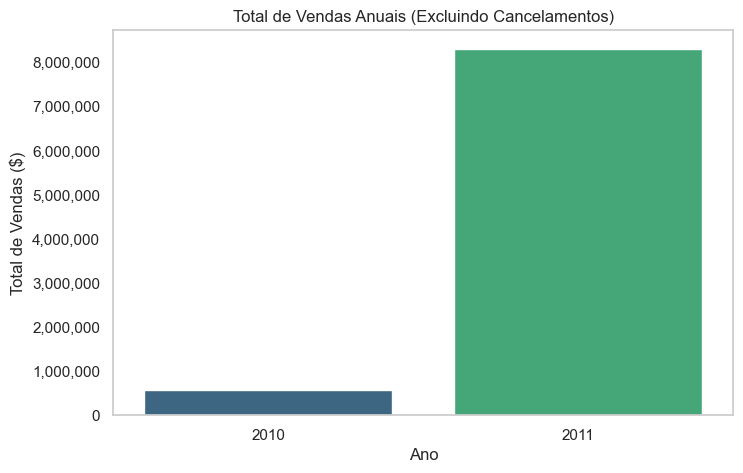

In [19]:
# Agrupar por Ano para ver crescimento anual
yearly_sales = df_sales.groupby('Year')['TotalPrice'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="viridis")
plt.title('Total de Vendas Anuais (Excluindo Cancelamentos)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas ($)')
# Formatando o eixo Y para melhor leitura de valores monetários
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='y')
plt.show()




C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\4038677382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pattern.index, y=monthly_pattern.values, palette="magma")


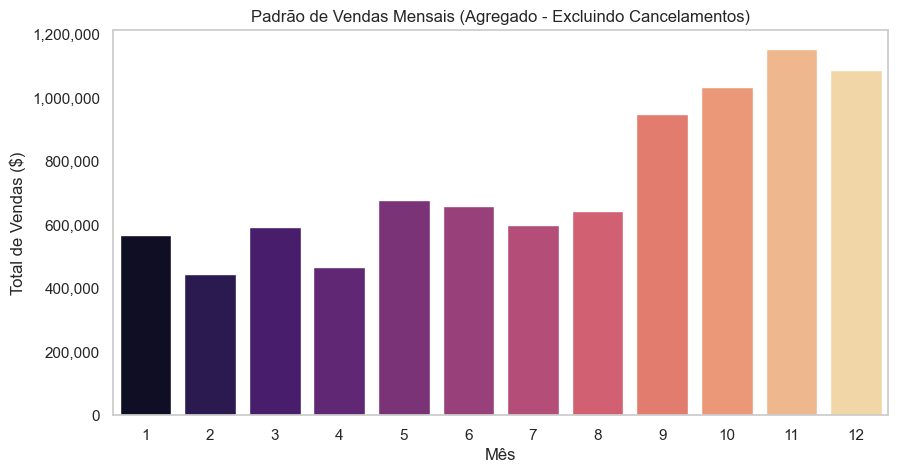

In [18]:
# Agrupar por Mês (agregando todos os anos) para ver sazonalidade mensal
monthly_pattern = df_sales.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_pattern.index, y=monthly_pattern.values, palette="magma")
plt.title('Padrão de Vendas Mensais (Agregado - Excluindo Cancelamentos)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas ($)')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='y')
plt.show()



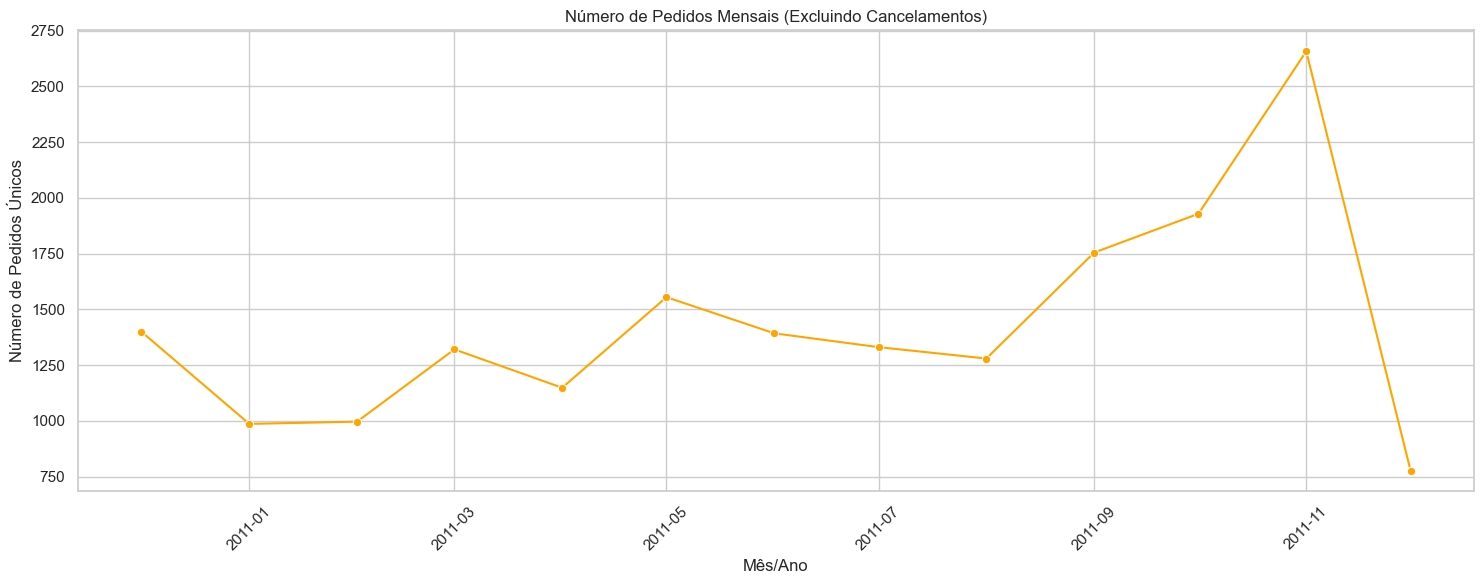


--- Análise de Vendas Geográficas ---

Top 10 Países por Total de Vendas:
Country
United Kingdom    $7,285,024.64
Netherlands         $285,446.34
EIRE                $265,262.46
Germany             $228,678.40
France              $208,934.31
Australia           $138,453.81
Spain                $61,558.56
Switzerland          $56,443.95
Belgium              $41,196.34
Sweden               $38,367.83
Name: TotalPrice, dtype: object


In [26]:
# (Opcional mas útil) Analisar número de pedidos ao longo do tempo
# Um pedido é único por InvoiceNo
monthly_orders = df_sales.groupby('MonthYear')['InvoiceNo'].nunique()
monthly_orders.index = monthly_orders.index.to_timestamp()

plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, color='orange', marker='o')
plt.title('Número de Pedidos Mensais (Excluindo Cancelamentos)')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Pedidos Únicos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Análise de Vendas por País
print("\n--- Análise de Vendas Geográficas ---")
# Calcular vendas totais por país e ordenar
country_sales = df_sales.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

print("\nTop 10 Países por Total de Vendas:")
# Formatando para melhor visualização
print(country_sales.head(10).apply(lambda x: f"${x:,.2f}"))


C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\3097795854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_sales.head(10).index, x=country_sales.head(10).values, palette="Spectral", orient='h')


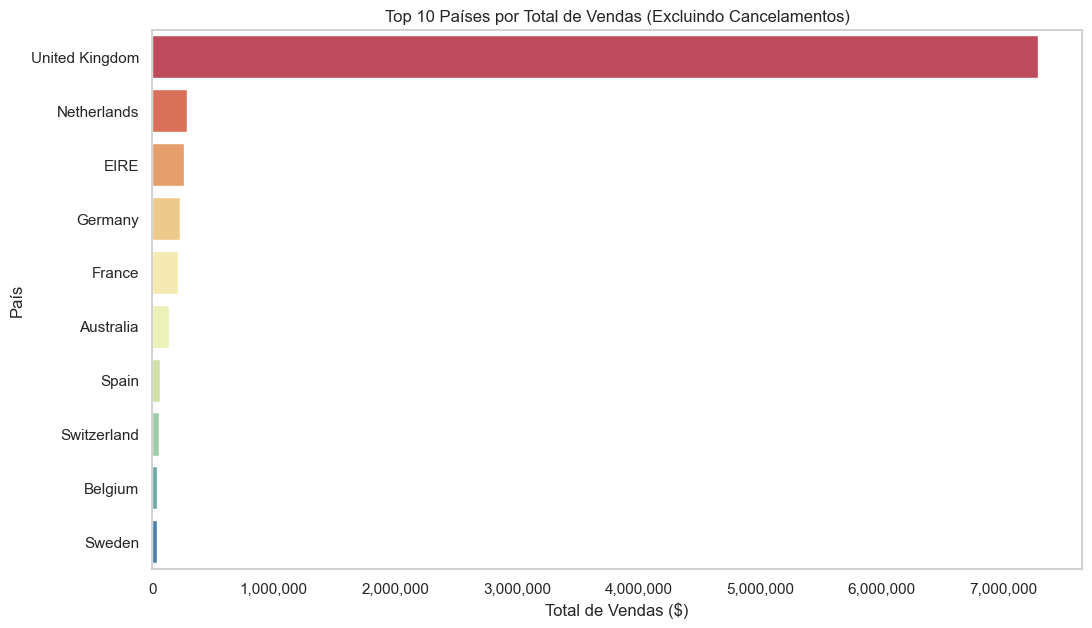

In [27]:
# Visualização dos Top 10 países
plt.figure(figsize=(12, 7))
# Usando o objeto Series diretamente com seaborn
sns.barplot(y=country_sales.head(10).index, x=country_sales.head(10).values, palette="Spectral", orient='h')
plt.title('Top 10 Países por Total de Vendas (Excluindo Cancelamentos)')
plt.xlabel('Total de Vendas ($)')
plt.ylabel('País')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='x')
plt.show()



C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\537067166.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_sales_no_uk.head(10).index, x=country_sales_no_uk.head(10).values, palette="coolwarm", orient='h')


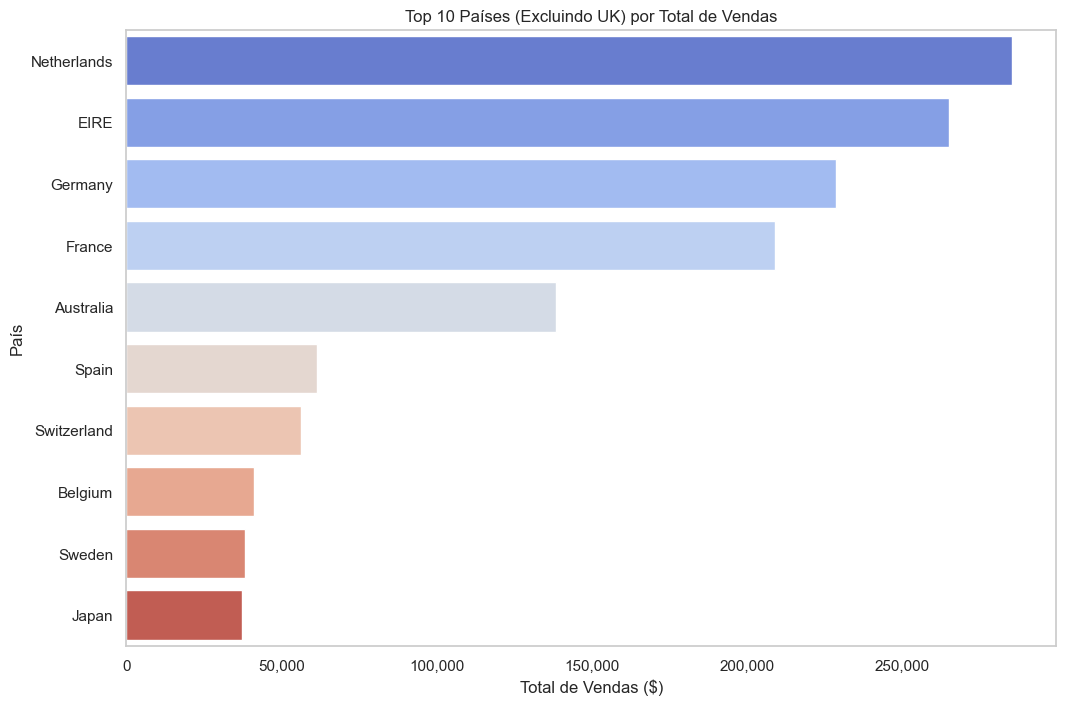


Análise temporal e geográfica concluída. Próximo passo: análise de produtos.


In [25]:
# Visualização sem UK para melhor escala dos outros
country_sales_no_uk = country_sales[1:] # Exclui o primeiro (UK)

plt.figure(figsize=(12, 8))
# Pegando os top 10 do restante
sns.barplot(y=country_sales_no_uk.head(10).index, x=country_sales_no_uk.head(10).values, palette="coolwarm", orient='h')
plt.title('Top 10 Países (Excluindo UK) por Total de Vendas')
plt.xlabel('Total de Vendas ($)')
plt.ylabel('País')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='x')
plt.show()

print("\nAnálise temporal e geográfica concluída. Próximo passo: análise de produtos.")

#### Análise dos cancelamentos

--- Análise de Cancelamentos ---
Número total de linhas de transação (limpas): 401564
Número total de linhas de cancelamento: 8872
Taxa geral de cancelamento (por linha): 2.21%


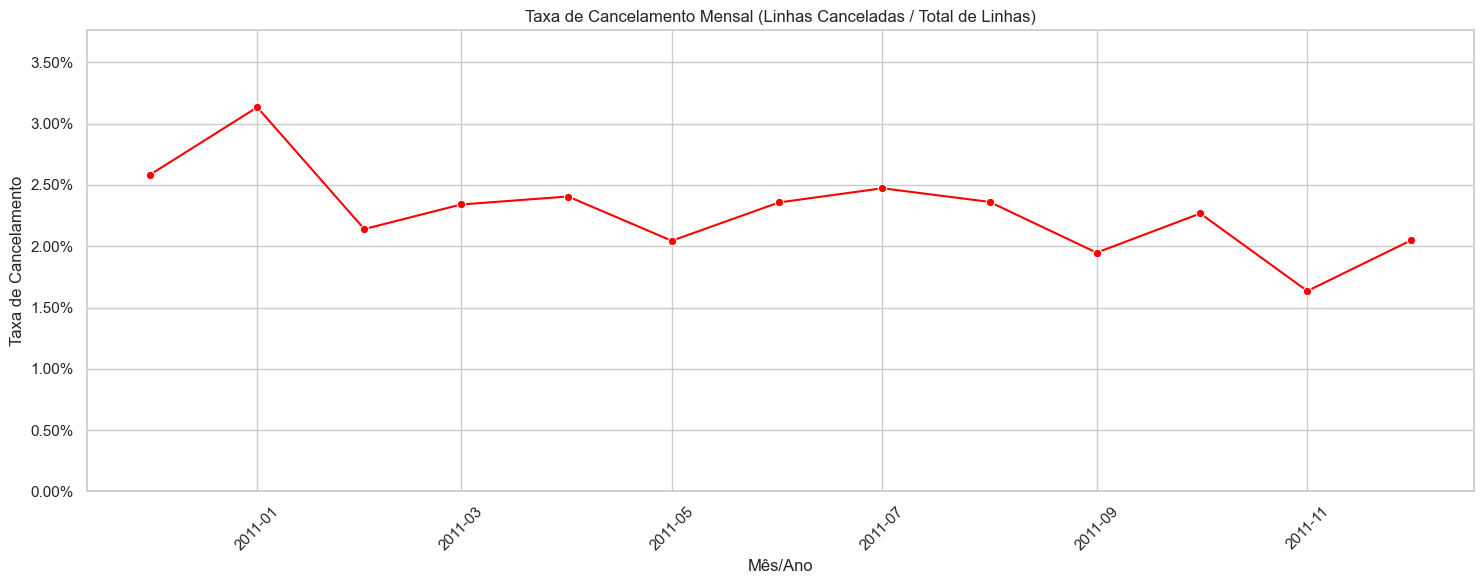

In [30]:
# -- Análise de Cancelamentos (Parte do Passo 3: EDA) --

print("--- Análise de Cancelamentos ---")

# 1. Taxa Geral de Cancelamento (baseada nas linhas do DataFrame limpo)
total_transactions = len(df_cleaned)
total_cancellations = df_cleaned['IsCancelled'].sum()
cancellation_rate = total_cancellations / total_transactions

print(f"Número total de linhas de transação (limpas): {total_transactions}")
print(f"Número total de linhas de cancelamento: {total_cancellations}")
print(f"Taxa geral de cancelamento (por linha): {cancellation_rate:.2%}")

# Separar DataFrame de cancelamentos para análise específica
df_cancelled = df_cleaned[df_cleaned['IsCancelled'] == True].copy()

# 2. Taxa de Cancelamento ao Longo do Tempo (Mensal)
# Contar total de linhas por mês
monthly_total_lines = df_cleaned.groupby('MonthYear')['InvoiceNo'].count()
# Contar linhas de cancelamento por mês
monthly_cancelled_lines = df_cancelled.groupby('MonthYear')['InvoiceNo'].count()

# Calcular taxa mensal - Preencher meses sem cancelamentos com 0
monthly_cancellation_rate = (monthly_cancelled_lines / monthly_total_lines).fillna(0)

# Converter índice para timestamp para plotagem
monthly_cancellation_rate.index = monthly_cancellation_rate.index.to_timestamp()

# Visualização - Taxa de Cancelamento Mensal
plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_cancellation_rate.index, y=monthly_cancellation_rate.values, marker='o', color='red')
plt.title('Taxa de Cancelamento Mensal (Linhas Canceladas / Total de Linhas)')
plt.xlabel('Mês/Ano')
plt.ylabel('Taxa de Cancelamento')
plt.ylim(0, monthly_cancellation_rate.max() * 1.2) # Ajustar limite Y para melhor visualização
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(xmax=1)) # Formatar eixo Y como porcentagem
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




Top 15 Produtos Mais Frequentemente Cancelados (por linha de cancelamento):
Description
REGENCY CAKESTAND 3 TIER              180
Manual                                175
POSTAGE                                97
JAM MAKING SET WITH JARS               86
Discount                               77
SET OF 3 CAKE TINS PANTRY DESIGN       72
STRAWBERRY CERAMIC TRINKET BOX         54
ROSES REGENCY TEACUP AND SAUCER        53
RECIPE BOX PANTRY YELLOW DESIGN        47
JUMBO BAG RED RETROSPOT                44
GREEN REGENCY TEACUP AND SAUCER        42
WHITE HANGING HEART T-LIGHT HOLDER     42
WOOD 2 DRAWER CABINET WHITE FINISH     42
LUNCH BAG RED RETROSPOT                42
RED RETROSPOT CAKE STAND               41
Name: count, dtype: int64


C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\1338624532.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cancelled_products_freq.index, x=top_cancelled_products_freq.values, palette="Reds_r", orient='h')


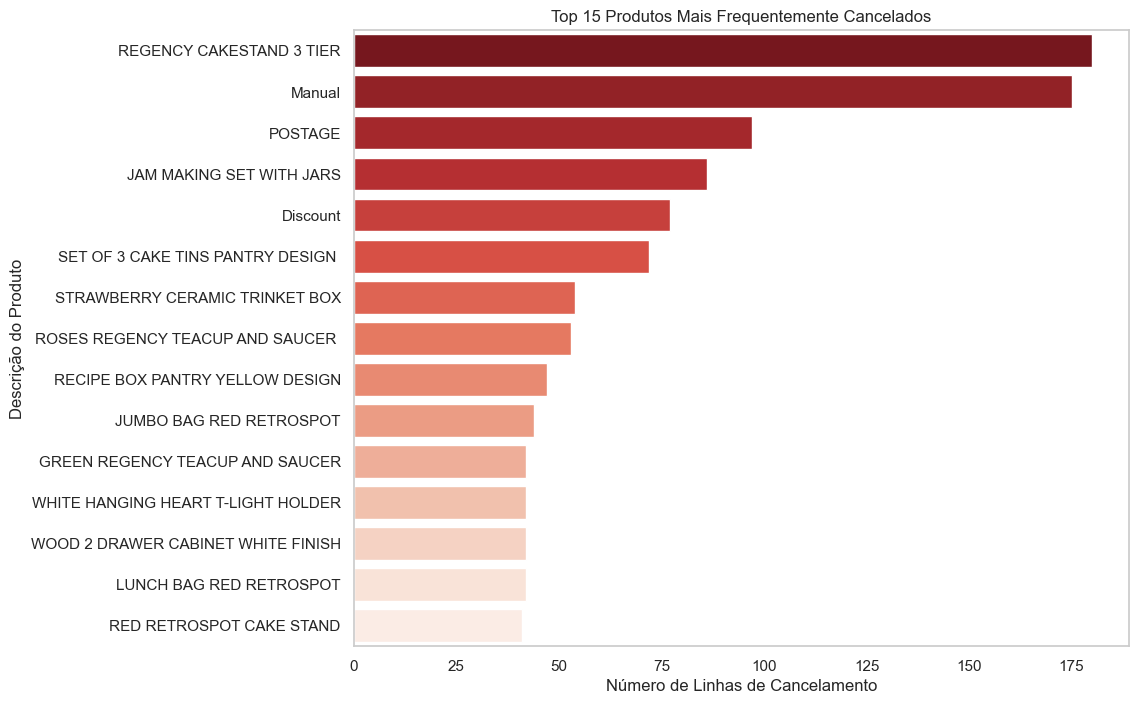

In [31]:
# 3. Produtos Mais Cancelados

# Por Frequência (número de vezes que o item aparece em cancelamentos)
top_cancelled_products_freq = df_cancelled['Description'].value_counts().head(15)

print("\nTop 15 Produtos Mais Frequentemente Cancelados (por linha de cancelamento):")
print(top_cancelled_products_freq)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_cancelled_products_freq.index, x=top_cancelled_products_freq.values, palette="Reds_r", orient='h')
plt.title('Top 15 Produtos Mais Frequentemente Cancelados')
plt.xlabel('Número de Linhas de Cancelamento')
plt.ylabel('Descrição do Produto')
plt.grid(axis='x')
plt.show()




Top 15 Produtos com Maior Quantidade Total Cancelada (Mais Negativo):
Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         74494
ROTATING SILVER ANGELS T-LIGHT HLDR     9367
Manual                                  3995
FAIRY CAKE FLANNEL ASSORTED COLOUR      3150
WHITE HANGING HEART T-LIGHT HOLDER      2578
GIN + TONIC DIET METAL SIGN             2030
HERB MARKER BASIL                       1527
FELTCRAFT DOLL MOLLY                    1447
TEA TIME PARTY BUNTING                  1424
PAPER POCKET TRAVELING FAN              1385
PINK BLUE FELT CRAFT TRINKET BOX        1321
WORLD WAR 2 GLIDERS ASSTD DESIGNS       1200
Discount                                1194
COLOUR GLASS. STAR T-LIGHT HOLDER       1174
Name: Quantity, dtype: int64


C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\2022981316.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=total_cancelled_quantity_abs.index, x=total_cancelled_quantity_abs.values, palette="Reds_r", orient='h')


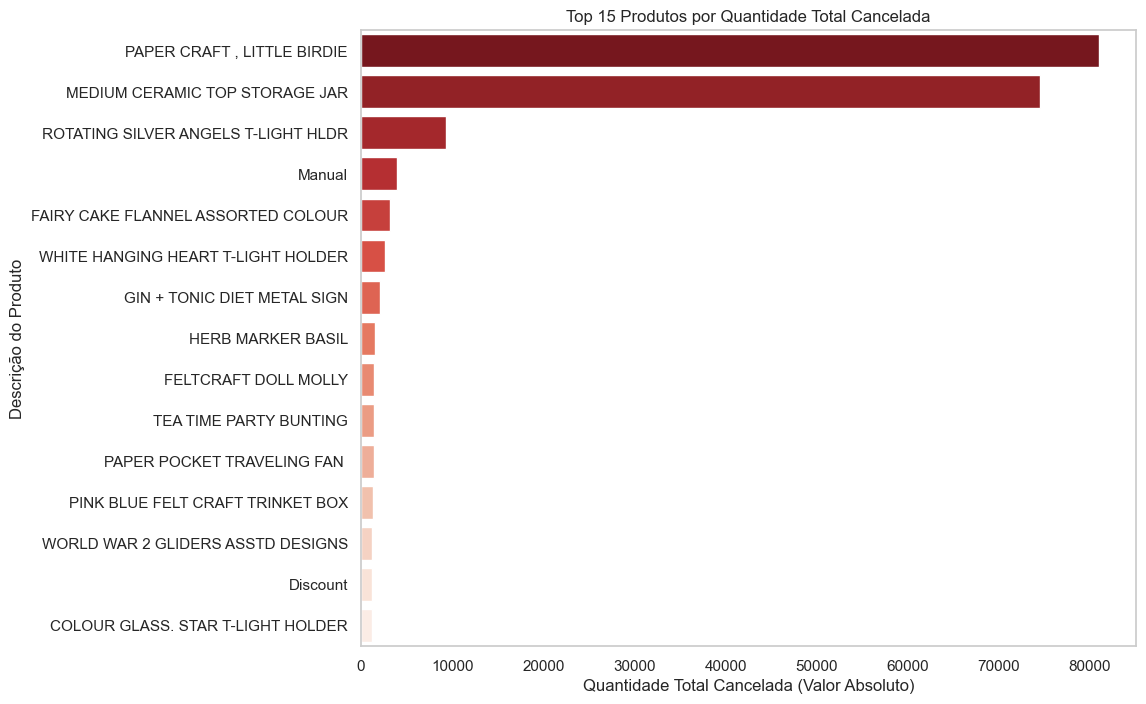

In [32]:
# Por Quantidade Total Cancelada (Soma das Quantidades Negativas)
# Como a quantidade já é negativa em cancelamentos, somamos diretamente
total_cancelled_quantity = df_cancelled.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(15) # Ascending=True porque queremos os mais negativos

print("\nTop 15 Produtos com Maior Quantidade Total Cancelada (Mais Negativo):")
# Inverter para mostrar valores positivos para facilitar leitura do gráfico
total_cancelled_quantity_abs = total_cancelled_quantity.abs()
print(total_cancelled_quantity_abs)


plt.figure(figsize=(10, 8))
sns.barplot(y=total_cancelled_quantity_abs.index, x=total_cancelled_quantity_abs.values, palette="Reds_r", orient='h')
plt.title('Top 15 Produtos por Quantidade Total Cancelada')
plt.xlabel('Quantidade Total Cancelada (Valor Absoluto)')
plt.ylabel('Descrição do Produto')
plt.grid(axis='x')
plt.show()





Top 15 Produtos com Maior Valor Total Cancelado (Maior Prejuízo):
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
Manual                                112165.39
MEDIUM CERAMIC TOP STORAGE JAR         77479.64
POSTAGE                                11093.72
REGENCY CAKESTAND 3 TIER                9697.05
CRUK Commission                         7933.43
WHITE HANGING HEART T-LIGHT HOLDER      6624.30
FAIRY CAKE FLANNEL ASSORTED COLOUR      6591.42
Discount                                5696.22
PANTRY CHOPPING BOARD                   4803.06
DOORMAT FAIRY CAKE                      4554.90
GIN + TONIC DIET METAL SIGN             3775.33
TEA TIME PARTY BUNTING                  3692.95
FELTCRAFT DOLL MOLLY                    3512.65
COLOUR GLASS. STAR T-LIGHT HOLDER       3246.16
Name: TotalPrice, dtype: float64


C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\2731614640.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=total_cancelled_value_abs.index, x=total_cancelled_value_abs.values, palette="Reds_r", orient='h')


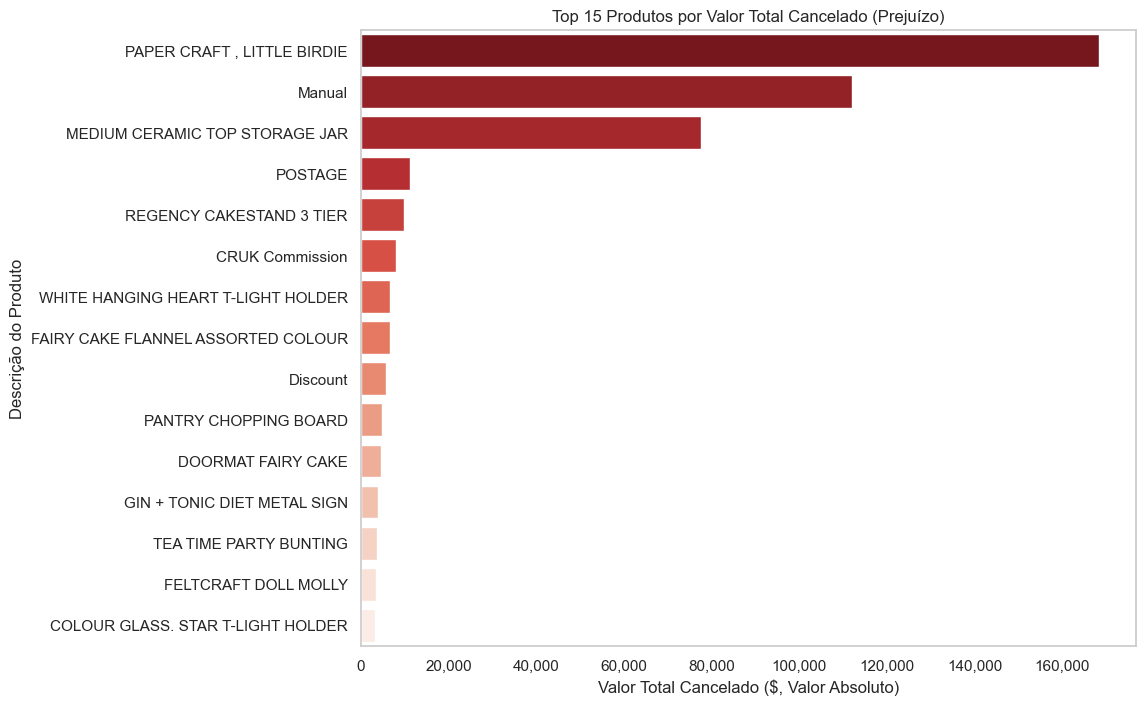


Análise inicial de cancelamentos concluída.


In [33]:
# Por Valor Total Cancelado (Soma dos TotalPrice negativos)
total_cancelled_value = df_cancelled.groupby('Description')['TotalPrice'].sum().sort_values(ascending=True).head(15)

print("\nTop 15 Produtos com Maior Valor Total Cancelado (Maior Prejuízo):")
# Inverter para mostrar valores positivos para facilitar leitura do gráfico
total_cancelled_value_abs = total_cancelled_value.abs()
print(total_cancelled_value_abs)


plt.figure(figsize=(10, 8))
sns.barplot(y=total_cancelled_value_abs.index, x=total_cancelled_value_abs.values, palette="Reds_r", orient='h')
plt.title('Top 15 Produtos por Valor Total Cancelado (Prejuízo)')
plt.xlabel('Valor Total Cancelado ($, Valor Absoluto)')
plt.ylabel('Descrição do Produto')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='x')
plt.show()


print("\nAnálise inicial de cancelamentos concluída.")

#### Análise de Produtos Comprados Juntos (Market Basket Analysis)

In [37]:
# Instalar mlxtend se ainda não tiver (necessário para apriori)
try:
    from mlxtend.frequent_patterns import apriori, association_rules
except ImportError:
    print("Instalando mlxtend...")
    # Se estiver no notebook/colab:
    # !pip install mlxtend
    # Se estiver no terminal/VSCode com ambiente ativado:
    # pip install mlxtend
    # Importar novamente após a instalação
    from mlxtend.frequent_patterns import apriori, association_rules
    print("mlxtend instalado com sucesso. Pode ser necessário reiniciar o kernel/ambiente.")

# -- Análise de Produtos Comprados Juntos (Market Basket Analysis - Parte do Passo 3: EDA) --

print("\n--- Análise de Cesta de Compras (Market Basket Analysis) ---")

# Usar o DataFrame de vendas (sem cancelamentos)
# df_sales já foi criado anteriormente (df_cleaned[df_cleaned['IsCancelled'] == False])

# Focar no mercado principal (UK) para simplificar e obter regras mais significativas inicialmente
# (MBA pode ser pesado computacionalmente)
df_uk_sales = df_sales[df_sales['Country'] == 'United Kingdom'].copy()
print(f"Analisando {df_uk_sales['InvoiceNo'].nunique()} transações do Reino Unido.")

# Preparar os dados para o Apriori: Criar a matriz de transações x produtos
# Usaremos StockCode pois é mais consistente que Description
# Agrupar por InvoiceNo e StockCode, contar ocorrências (só precisamos saber se existe > 0)
# Usar pivot_table é uma forma eficiente
basket = pd.pivot_table(data=df_uk_sales,
                        index='InvoiceNo',
                        columns='StockCode',
                        values='Quantity', # Pode ser qualquer coluna numérica aqui
                        aggfunc='count',  # Conta quantas vezes o item aparece na fatura
                        fill_value=0)     # Preenche com 0 se o item não está na fatura

# Converter para o formato one-hot encoding (0 ou 1)
# Se a contagem > 0, significa que o item está na cesta (1), senão (0)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_units)

# Verificar se há itens com nomes problemáticos (ex: POSTAGE que não é um produto 'comprável')
# Se POSTAGE ou outros itens não desejados estiverem como colunas, podemos removê-los
items_to_remove = ['POSTAGE', 'Manual', 'M', 'D', 'C2', 'BANK CHARGES', 'PADS', 'DOT'] # Adicionar outros se necessário
columns_to_drop = [item for item in items_to_remove if item in basket_encoded.columns]
if columns_to_drop:
    basket_encoded = basket_encoded.drop(columns=columns_to_drop)
    print(f"Removidas colunas não-produto: {columns_to_drop}")


print(f"Dimensões da matriz para Apriori (Transações x Produtos): {basket_encoded.shape}")

# Aplicar o algoritmo Apriori para encontrar itemsets frequentes
# min_support: define a frequência mínima para um itemset ser considerado.
# É um valor entre 0 e 1. Começar com um valor baixo (ex: 0.01 = 1%) e ajustar se necessário.
# Se gerar muitos resultados ou demorar muito, aumente o min_support.
# Se gerar poucos ou nenhum resultado, diminua o min_support.
min_support_threshold = 0.02 # Tentativa inicial: itemsets presentes em pelo menos 2% das transações UK

print(f"Executando Apriori com min_support = {min_support_threshold}...")
frequent_itemsets = apriori(basket_encoded, min_support=min_support_threshold, use_colnames=True)

if frequent_itemsets.empty:
    print(f"Nenhum itemset frequente encontrado com min_support = {min_support_threshold}. Tente um valor menor.")
else:
    print(f"Encontrados {len(frequent_itemsets)} itemsets frequentes.")
    print("\nTop 10 Itemsets Frequentes (por Suporte):")
    print(frequent_itemsets.sort_values('support', ascending=False).head(10))

    # Gerar regras de associação a partir dos itemsets frequentes
    # metric: 'confidence' ou 'lift'.
    #   - Confidence(A->B): Probabilidade de comprar B, dado que A foi comprado. (Quão confiável é a regra)
    #   - Lift(A->B): Quão mais provável é comprar B quando A é comprado, comparado a comprar B normalmente.
    #     Lift > 1: Associação positiva (Aumenta a chance de B)
    #     Lift = 1: Independente
    #     Lift < 1: Associação negativa (Diminui a chance de B)
    # min_threshold: valor mínimo para a métrica escolhida.
    print("\nGerando regras de associação (usando Lift > 1.5)...")
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5) # Usar lift > 1.5 para regras mais fortes

    if rules.empty:
        print("Nenhuma regra de associação encontrada com os critérios atuais (Lift > 1.5). Tente diminuir o threshold ou o min_support.")
    else:
        # Ordenar as regras por 'lift' ou 'confidence' para ver as mais interessantes
        rules_sorted = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

        print(f"\nEncontradas {len(rules_sorted)} regras de associação com Lift > 1.5.")
        print("Top 15 Regras de Associação (ordenadas por Lift e Confidence):")

        # Para melhor leitura, podemos mapear StockCodes para Descrições (opcional, requer um dicionário)
        # Criar um mapa rápido StockCode -> Description (pega a primeira descrição encontrada)
        stock_desc_map = df_uk_sales.drop_duplicates('StockCode').set_index('StockCode')['Description'].to_dict()

        def get_desc(stock_code_frozenset):
            try:
                # Tenta mapear cada código no frozenset para sua descrição
                 return frozenset([stock_desc_map.get(code, code) for code in stock_code_frozenset])
            except Exception: # Se algo der errado (ex: o item não está no mapa), retorna o original
                 return stock_code_frozenset

        # Aplicar o mapeamento (cuidado, pode ficar longo se as descrições forem grandes)
        # rules_readable = rules_sorted.copy()
        # rules_readable['antecedents'] = rules_readable['antecedents'].apply(get_desc)
        # rules_readable['consequents'] = rules_readable['consequents'].apply(get_desc)
        # print(rules_readable[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15))

        # Imprimir com StockCodes (mais conciso)
        print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15))

print("\nAnálise de Cesta de Compras concluída.")


--- Análise de Cesta de Compras (Market Basket Analysis) ---
Analisando 16646 transações do Reino Unido.


C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\1805736475.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(encode_units)


Removidas colunas não-produto: ['M', 'C2', 'BANK CHARGES', 'PADS', 'DOT']
Dimensões da matriz para Apriori (Transações x Produtos): (16646, 3640)
Executando Apriori com min_support = 0.02...


C:\Users\Peter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Encontrados 244 itemsets frequentes.

Top 10 Itemsets Frequentes (por Suporte):
      support  itemsets
200  0.113601  (85123A)
197  0.086928  (85099B)
79   0.084705   (22423)
189  0.078097   (84879)
166  0.077496   (47566)
7    0.067283   (20725)
112  0.060495   (22720)
9    0.059834   (20727)
143  0.058993   (23203)
74   0.057611   (22383)

Gerando regras de associação (usando Lift > 1.5)...

Encontradas 86 regras de associação com Lift > 1.5.
Top 15 Regras de Associação (ordenadas por Lift e Confidence):
       antecedents     consequents   support  confidence       lift
81  (22698, 22699)         (22697)  0.020485    0.890339  24.216650
84         (22697)  (22698, 22699)  0.020485    0.557190  24.216650
83         (22698)  (22697, 22699)  0.020485    0.691684  24.188581
82  (22697, 22699)         (22698)  0.020485    0.716387  24.188581
55         (22697)         (22698)  0.024270    0.660131  22.289120
54         (22698)         (22697)  0.024270    0.819473  22.289120
80  (22697,

 ### Passo 4: Segmentação de Clientes.


--- Iniciando Segmentação RFM ---
Data de referência (Snapshot Date): 2011-12-10

DataFrame RFM agregado por cliente criado com shape: (4338, 3)
Primeiras linhas do RFM Data:
            Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12347             2          7        4310.00
12348            75          4        1797.24
12349            19          1        1757.55
12350           310          1         334.40

Scores R, F, M calculados.
Distribuição dos Scores:
Recency Scores:
 R_Score
1    865
2    843
3    858
4    904
5    868
Name: count, dtype: int64
Frequency Scores:
 F_Score
1    868
2    867
3    868
4    867
5    868
Name: count, dtype: int64
Monetary Scores:
 M_Score
1    868
2    867
3    868
4    867
5    868
Name: count, dtype: int64

Score RFM combinado criado.
Exemplo de Scores Combinados:
            Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
CustomerID             

C:\Users\Peter\AppData\Local\Temp\ipykernel_23324\1774392288.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis', orient='h')


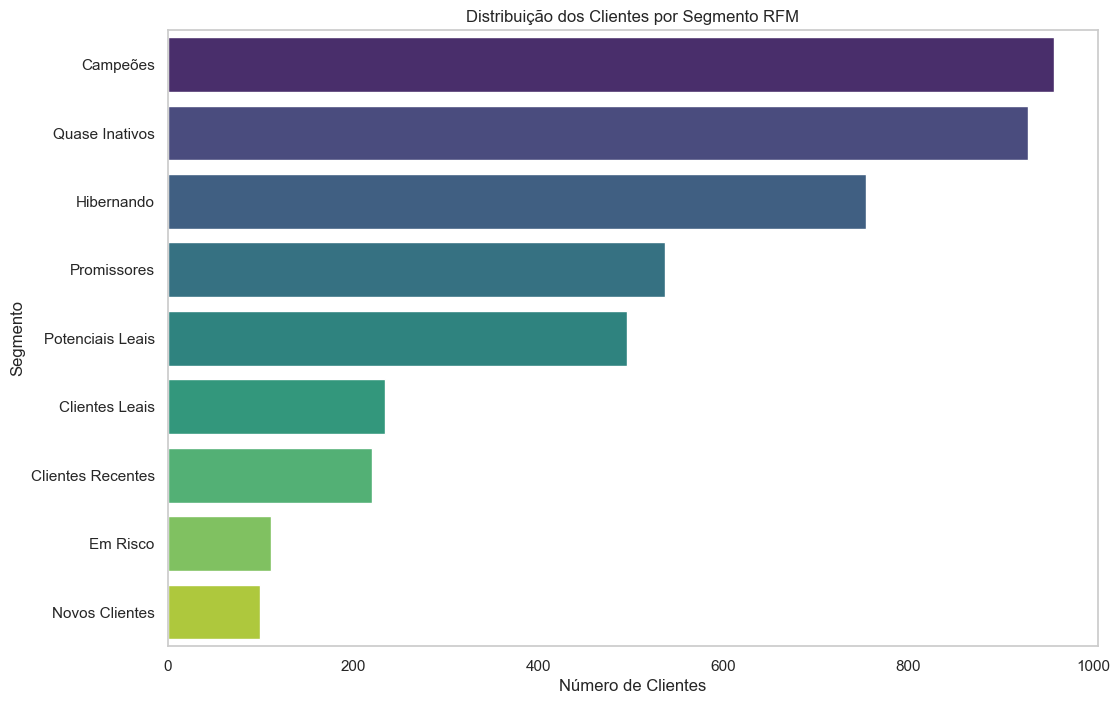


Análise das Médias de R, F, M e Contagem por Segmento:
                   Recency_Mean  Frequency_Mean  MonetaryValue_Mean  \
Segment                                                               
Campeões                   12.8            11.1              6051.9   
Quase Inativos            110.2             2.6               875.2   
Hibernando                273.7             1.2               454.6   
Promissores                53.4             1.6               606.3   
Potenciais Leais           16.2             3.0              1077.7   
Clientes Leais             50.4             6.4              3061.3   
Clientes Recentes          23.7             1.2               435.5   
Em Risco                  233.9             3.5              1937.1   
Novos Clientes              7.1             1.3               499.1   

                   NumClientes  
Segment                         
Campeões                   957  
Quase Inativos             929  
Hibernando                 754

In [39]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assumindo que df_cleaned foi criado nos passos anteriores
# Filtrar cancelamentos para análise de vendas
df_sales = df_cleaned[df_cleaned['IsCancelled'] == False].copy()


# -- Passo 4: Segmentação de Clientes (RFM) --

print("\n--- Iniciando Segmentação RFM ---")

# 1. Calcular Recência, Frequência e Valor Monetário para cada Cliente

# Definir a data de referência para cálculo da Recência
# Usaremos o dia seguinte à última data de compra no dataset
snapshot_date = df_sales['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Data de referência (Snapshot Date): {snapshot_date.strftime('%Y-%m-%d')}")

# Agrupar por cliente e calcular R, F, M
rfm_data = df_sales.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recência (dias desde a última compra)
    'InvoiceNo': 'nunique',                                       # Frequência (número de transações únicas)
    'TotalPrice': 'sum'                                           # Monetário (valor total gasto)
})

# Renomear colunas para clareza
rfm_data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalPrice': 'MonetaryValue'}, inplace=True)

print(f"\nDataFrame RFM agregado por cliente criado com shape: {rfm_data.shape}")
print("Primeiras linhas do RFM Data:")
print(rfm_data.head())

# 2. Criar Scores RFM (usando Quintis - 5 grupos)

# Criar labels para os scores (1=Pior, 5=Melhor)
r_labels = range(5, 0, -1) # Recência: Menor valor é melhor (mais recente = 5)
f_labels = range(1, 6)    # Frequência: Maior valor é melhor
m_labels = range(1, 6)    # Monetário: Maior valor é melhor

# Calcular scores usando qcut (divide em quantis)
#duplicates='drop' para lidar com casos onde os limites dos quantis são iguais
# Convertendo para Int64 para evitar erro se houver NaNs temporários ou se qcut retornar float
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q=5, labels=r_labels, duplicates='drop').astype('Int64')
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), q=5, labels=f_labels, duplicates='drop').astype('Int64') # Rank para desempatar frequências iguais
rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], q=5, labels=m_labels, duplicates='drop').astype('Int64')

# Tratar possíveis NaNs introduzidos pelo qcut se houver muitos valores idênticos nos limites
rfm_data.dropna(subset=['R_Score', 'F_Score', 'M_Score'], inplace=True)

# Converter para inteiros após tratar NaNs
rfm_data['R_Score'] = rfm_data['R_Score'].astype(int)
rfm_data['F_Score'] = rfm_data['F_Score'].astype(int)
rfm_data['M_Score'] = rfm_data['M_Score'].astype(int)


print("\nScores R, F, M calculados.")
print("Distribuição dos Scores:")
print("Recency Scores:\n", rfm_data['R_Score'].value_counts().sort_index())
print("Frequency Scores:\n", rfm_data['F_Score'].value_counts().sort_index())
print("Monetary Scores:\n", rfm_data['M_Score'].value_counts().sort_index())


# 3. Combinar Scores RFM
# Concatenar os scores como string
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + \
                        rfm_data['F_Score'].astype(str) + \
                        rfm_data['M_Score'].astype(str)

print("\nScore RFM combinado criado.")
print("Exemplo de Scores Combinados:")
print(rfm_data[['Recency', 'Frequency', 'MonetaryValue', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head())

# 4. Definir Segmentos RFM (Exemplo de Mapeamento)
# Usaremos expressões regulares (regex) para mapear padrões de RFM_Score a segmentos
segment_map = {
    r'[4-5][4-5][4-5]': 'Campeões',             # R >= 4, F >= 4, M >= 4
    r'[3-5][4-5][4-5]': 'Clientes Leais',       # R >= 3, F >= 4, M >= 4 (excluindo Campeões)
    r'[4-5][3-5][1-5]': 'Potenciais Leais',     # R >= 4, F >= 3
    r'[5][1-5][1-5]':   'Novos Clientes',       # R = 5
    r'[4][1-5][1-5]':   'Clientes Recentes',    # R = 4 (excluindo Potenciais Leais)
    r'[3-5][1-3][1-5]': 'Promissores',          # R >= 3, F <= 3
    r'[3-4][3-5][3-5]': 'Precisam de Atenção',  # Não captura muitos com as regras atuais, pode ser ajustado
    r'[2-3][1-5][1-5]': 'Quase Inativos',       # R = 2 ou 3
    r'[1-2][3-5][3-5]': 'Em Risco',             # R <= 2, F >= 3, M >= 3
    r'[1][1-5][1-5]':   'Hibernando',           # R = 1
    r'[1-2][1-2][1-2]': 'Clientes Perdidos'     # R <= 2, F <= 2, M <= 2
}

# Aplicar o mapeamento
rfm_data['Segment'] = 'Outros' # Default
for pattern, segment_name in segment_map.items():
    rfm_data.loc[rfm_data['RFM_Score'].str.match(pattern), 'Segment'] = segment_name

# Garantir que os segmentos mais específicos (como Campeões) prevaleçam sobre os mais genéricos
# Aplicar em ordem de especificidade ou reaplicar os mais importantes no final
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[1-2][1-2][1-2]'), 'Segment'] = 'Clientes Perdidos'
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[1][1-5][1-5]'), 'Segment'] = 'Hibernando'
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[1-2][3-5][3-5]'), 'Segment'] = 'Em Risco'
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[2-3][1-5][1-5]'), 'Segment'] = 'Quase Inativos' # Inclui R=3
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[3][1-3][1-5]'), 'Segment'] = 'Promissores' # R=3, F baixo
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[4][1-5][1-5]'), 'Segment'] = 'Clientes Recentes' # R=4
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[5][1-5][1-5]'), 'Segment'] = 'Novos Clientes' # R=5
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[4-5][3-5][1-5]'), 'Segment'] = 'Potenciais Leais' # R>=4, F>=3
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[3-5][4-5][4-5]'), 'Segment'] = 'Clientes Leais' # R>=3, F>=4, M>=4
rfm_data.loc[rfm_data['RFM_Score'].str.match(r'[4-5][4-5][4-5]'), 'Segment'] = 'Campeões' # R>=4, F>=4, M>=4 (Prioridade máxima)


print("\nSegmentos RFM definidos e mapeados.")

# 5. Analisar Segmentos

# Contagem de clientes por segmento
segment_counts = rfm_data['Segment'].value_counts().sort_values(ascending=False)

print("\nContagem de Clientes por Segmento:")
print(segment_counts)

# Visualização da distribuição dos segmentos
plt.figure(figsize=(12, 8))
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='viridis', orient='h')
plt.title('Distribuição dos Clientes por Segmento RFM')
plt.xlabel('Número de Clientes')
plt.ylabel('Segmento')
plt.grid(axis='x')
plt.show()


# Calcular as médias de R, F, M e a contagem por segmento (CORRIGIDO)
segment_analysis = rfm_data.groupby('Segment').agg(
    Recency_Mean=('Recency', 'mean'),
    Frequency_Mean=('Frequency', 'mean'),
    MonetaryValue_Mean=('MonetaryValue', 'mean'),
    NumClientes=('Recency', 'count')  # CORRIGIDO: Conta qualquer coluna existente
).sort_values('NumClientes', ascending=False)

print("\nAnálise das Médias de R, F, M e Contagem por Segmento:")
# Formatar para melhor leitura
print(segment_analysis.round(1))

print("\n--- Segmentação RFM Concluída ---")

# O DataFrame 'rfm_data' agora contém os scores e o segmento para cada cliente.